##Feature Engineering Start

> What to Focus on?

1. Train vs Test 비교 해보기

> 만약 dummy화 시킬거면, 각 열에 있는 값이 동일해야 하기 때문에 이 부분 checking

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train= pd.read_csv('/content/drive/MyDrive/잡케어/train_data_final.csv')
test= pd.read_csv('/content/drive/MyDrive/잡케어/test_data_final.csv')

In [3]:
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_open_dt_month,contents_open_dt_day,contents_open_dt_hour,contents_open_dt_minute,contents_open_dt_sec
0,1,1,1,0,0,0,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,3,316,94,398,58,368,94,422,1,17,12,9,36
1,0,0,0,1,1,0,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,94,417,94,400,94,399,94,417,6,18,17,48,52
2,0,0,0,1,0,0,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,48,364,250,528,48,366,48,363,7,8,20,0,10
3,0,0,0,1,0,0,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,71,379,226,495,1,315,71,381,1,13,18,9,34
4,1,1,1,0,0,0,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,208,483,208,481,208,480,71,381,3,9,20,39,22


In [4]:
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_l,person_prefer_h_1_m,person_prefer_h_2_l,person_prefer_h_2_m,person_prefer_h_3_l,person_prefer_h_3_m,contents_attribute_h_l,contents_attribute_h_m,contents_open_dt_month,contents_open_dt_day,contents_open_dt_hour,contents_open_dt_minute,contents_open_dt_sec
0,1,0,0,1,1,1,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,250,528,48,366,48,359,250,528,12,1,2,24,18
1,0,0,0,1,0,0,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,250,523,250,528,48,359,250,528,12,17,5,42,53
2,1,0,0,1,1,1,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,169,453,169,451,169,452,169,453,12,10,23,33,41
3,1,0,0,1,1,1,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,169,453,169,451,169,452,169,453,12,3,19,44,55
4,1,0,0,1,0,0,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,169,454,169,453,3,316,169,453,12,11,21,24,34


## 1. Train vs Test

In [5]:
uniq_tr=pd.DataFrame(train.nunique())
uniq_test=pd.DataFrame(test.nunique())

uniq_all=pd.concat([uniq_tr,uniq_test],axis=1)

In [6]:
uniq_all.drop('target',inplace=True)

In [7]:
uniq_all=uniq_all.astype(int)

In [8]:
uniq_all
# i,a,j_1,j,c,k,m, e

,0,0
d_l_match_yn,2,2
d_m_match_yn,2,2
d_s_match_yn,2,2
h_l_match_yn,2,2
h_m_match_yn,2,2
h_s_match_yn,2,2
person_attribute_a,2,2
person_attribute_a_1,8,8
person_attribute_b,6,6
person_prefer_c,5,5


In [9]:
len(train.columns)

60

In [10]:
#train
match_cols_train= train[['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn']]
person_attribute_cols_train= train[['person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b']]

person_prefer_cols_train= train[['person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3','person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m',
       'person_prefer_d_1_l', 'person_prefer_d_2_n', 'person_prefer_d_2_s',
       'person_prefer_d_2_m', 'person_prefer_d_2_l', 'person_prefer_d_3_n',
       'person_prefer_d_3_s', 'person_prefer_d_3_m', 'person_prefer_d_3_l', 'person_prefer_h_1_l', 'person_prefer_h_1_m', 'person_prefer_h_2_l',
       'person_prefer_h_2_m', 'person_prefer_h_3_l', 'person_prefer_h_3_m']]

contents_attribute_cols_train= train[['contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'contents_attribute_d_n', 'contents_attribute_d_s',
       'contents_attribute_d_m', 'contents_attribute_d_l', 'contents_attribute_h_l', 'contents_attribute_h_m']]

rn_train=train[['person_rn', 'contents_rn', 'target']]

time_train=train[['contents_open_dt_month', 'contents_open_dt_day',
       'contents_open_dt_hour', 'contents_open_dt_minute',
       'contents_open_dt_sec']]



#test
match_cols_test= test[['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn']]

person_attribute_cols_test= test[['person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b']]

person_prefer_cols_test= test[['person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3','person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m',
       'person_prefer_d_1_l', 'person_prefer_d_2_n', 'person_prefer_d_2_s',
       'person_prefer_d_2_m', 'person_prefer_d_2_l', 'person_prefer_d_3_n',
       'person_prefer_d_3_s', 'person_prefer_d_3_m', 'person_prefer_d_3_l', 'person_prefer_h_1_l', 'person_prefer_h_1_m', 'person_prefer_h_2_l',
       'person_prefer_h_2_m', 'person_prefer_h_3_l', 'person_prefer_h_3_m']]

contents_attribute_cols_test= test[['contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'contents_attribute_d_n', 'contents_attribute_d_s',
       'contents_attribute_d_m', 'contents_attribute_d_l', 'contents_attribute_h_l', 'contents_attribute_h_m']]


rn_test=test[['person_rn', 'contents_rn']]

time_test=test[['contents_open_dt_month', 'contents_open_dt_day',
       'contents_open_dt_hour', 'contents_open_dt_minute',
       'contents_open_dt_sec']]

> Match 항목들은 train, test 모두 0,1로 되어있기 때문에 나머지 col 확인해보자

# Person_attributes

dummy 가능 : 다 가능

그치만 person_attribute_a 는 unique 값 2개라서 제외

In [11]:
def comparison(df1, df2):
  for col in df1:
    print(df1[col].unique())
  print('----------------------')
  for col in df2:
    print(df2[col].unique())

In [12]:
comparison(person_attribute_cols_train, person_attribute_cols_test)
# person attribute에는 같은 unique 값 가짐 

[1 2]
[4 3 0 1 2 5 6 7]
[3 4 2 5 1 0]
----------------------
[1 2]
[1 0 3 2 6 7 4 5]
[2 4 3 5 1 0]


# person prefer

더미 가능 : c,e d3l, h1l,h2l,h3l

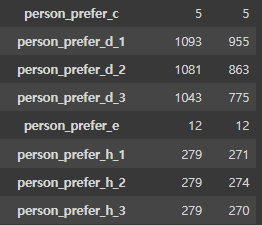

> d_1, d_2, d_3, h_1, h_2, h_3 은 그냥 봐도 차이가 있기 때문에 c,e를 보자.

분포도 비슷하고, col안에 있는 고유 값들이 동일하다.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

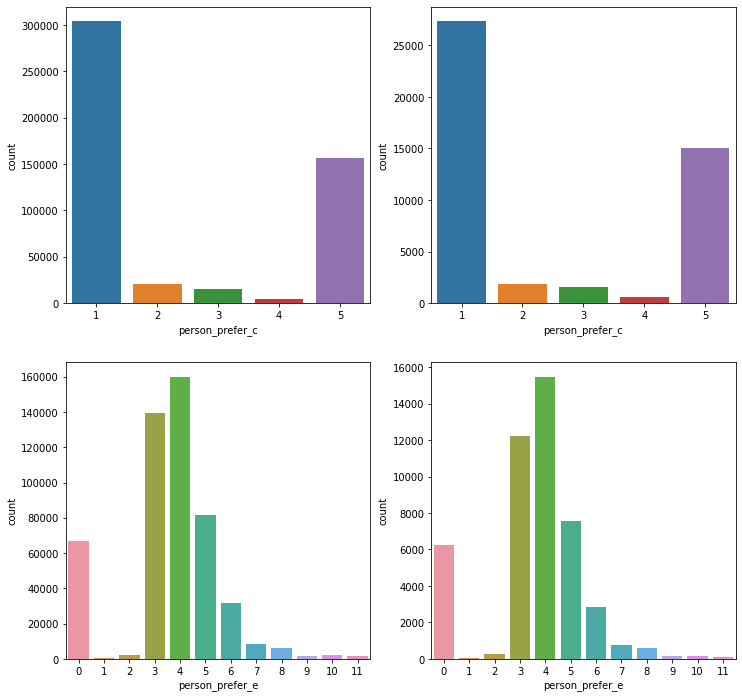

In [13]:
plt.figure(figsize=(12,12))

plt.subplot(221)
sns.countplot(train.person_prefer_c)

plt.subplot(222)
sns.countplot(test.person_prefer_c)

plt.subplot(223)
sns.countplot(train.person_prefer_e)

plt.subplot(224)
sns.countplot(test.person_prefer_e)

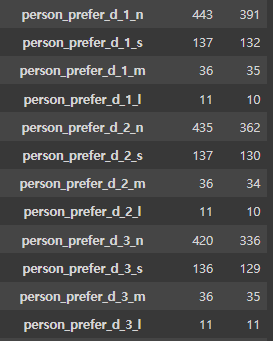

> 한개 아니면 두개씩 차이나는 경우는 왜 때문일까?

>

In [14]:
ppdl= ['person_prefer_d_1_l','person_prefer_d_2_l','person_prefer_d_3_l']
def plot_ppld(df):
  count=1
  plt.subplots(figsize=(10,10))
  for col in df[ppdl]:
    plt.subplot(3,1,count)
    sns.countplot(df[col])
    count+=1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


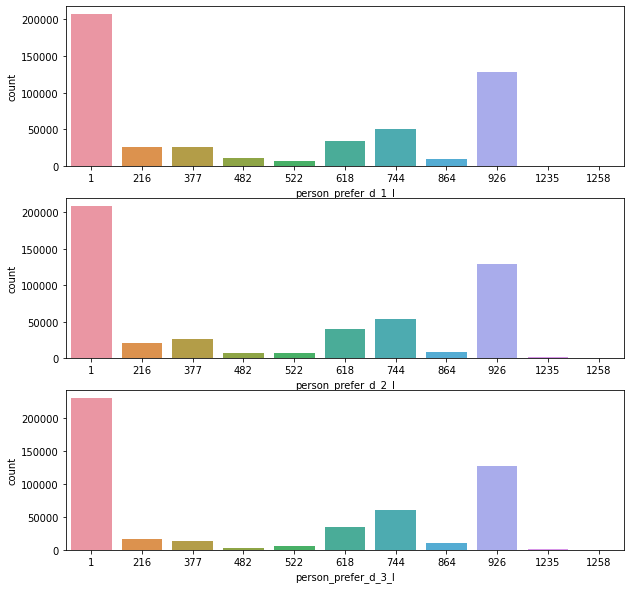

In [15]:
plot_ppld(train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


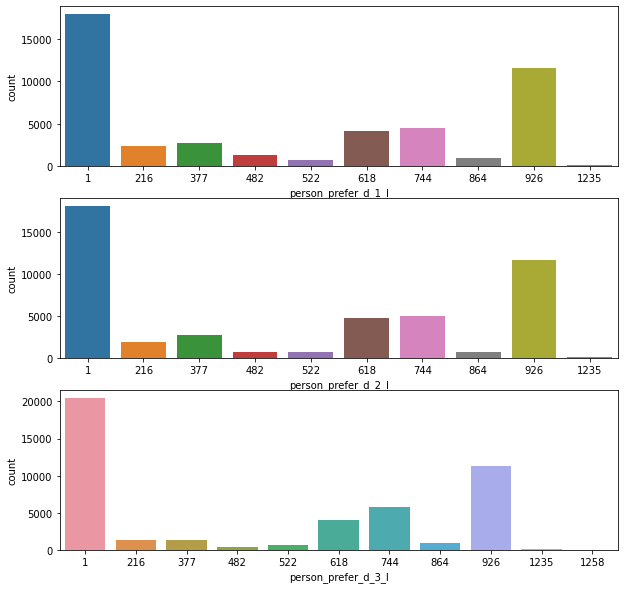

In [16]:
plot_ppld(test)

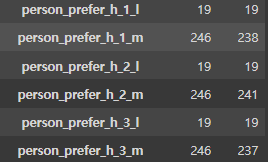

In [17]:
pphl= ['person_prefer_h_1_l','person_prefer_h_2_l','person_prefer_h_3_l']
def plot_pphl(df1):
  count=1
  plt.subplots(figsize=(10,10))
  for col in df1[pphl]:
    plt.subplot(3,1,count)
    sns.countplot(df1[col])
    count+=1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


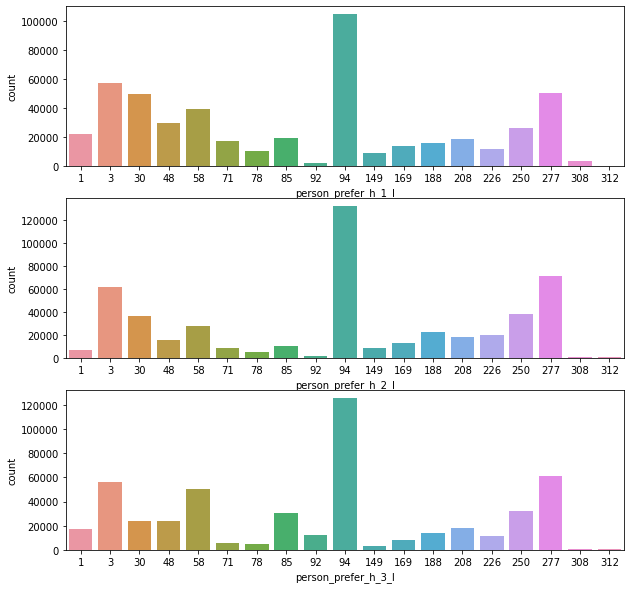

In [18]:
plot_pphl(train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


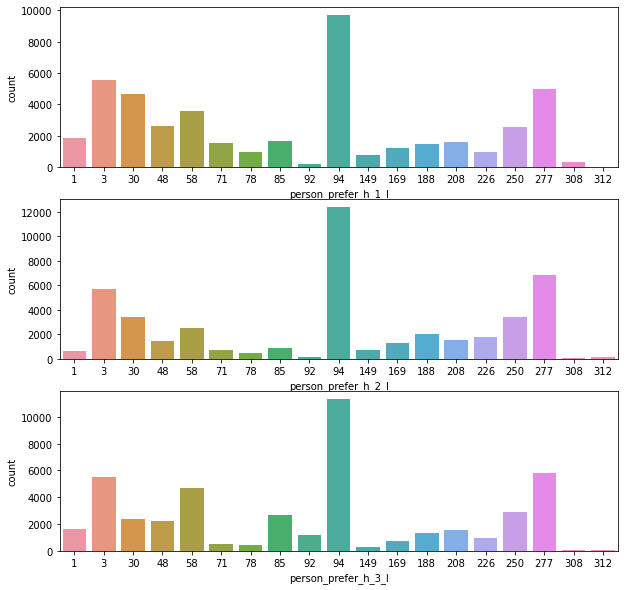

In [19]:
plot_pphl(test)

#contents attribute

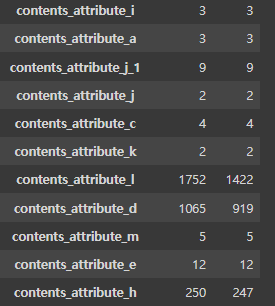

> i,a,j_1,j,c,k,d,m > dummy 가능

#contents attribute plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


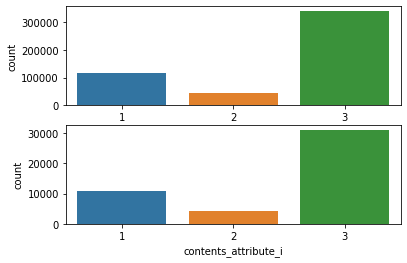

In [20]:
plt.subplot(211)
sns.countplot(train.contents_attribute_i)

plt.subplot(212)
sns.countplot(test.contents_attribute_i)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


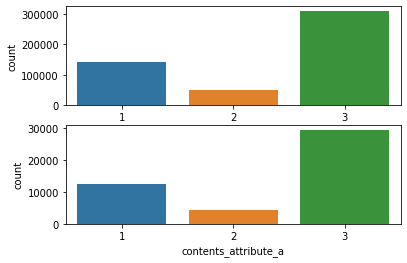

In [21]:
plt.subplot(211)
sns.countplot(train.contents_attribute_a)

plt.subplot(212)
sns.countplot(test.contents_attribute_a)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


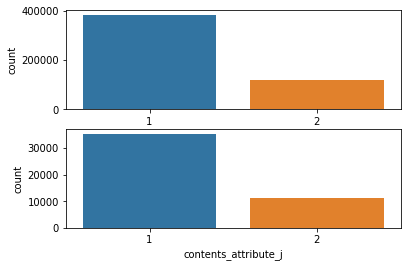

In [22]:
plt.subplot(211)
sns.countplot(train.contents_attribute_j)

plt.subplot(212)
sns.countplot(test.contents_attribute_j)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


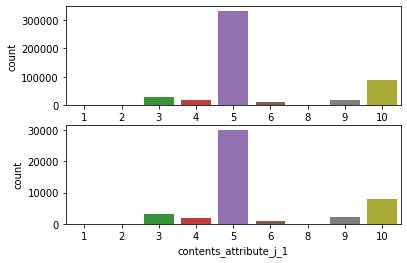

In [23]:
plt.subplot(211)
sns.countplot(train.contents_attribute_j_1)

plt.subplot(212)
sns.countplot(test.contents_attribute_j_1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


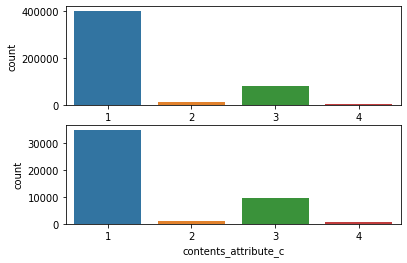

In [24]:
plt.subplot(211)
sns.countplot(train.contents_attribute_c)

plt.subplot(212)
sns.countplot(test.contents_attribute_c)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


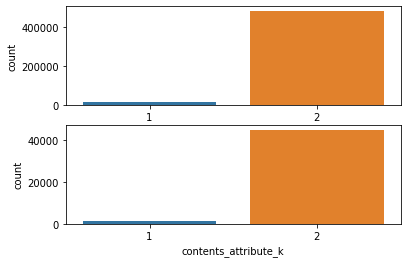

In [25]:
plt.subplot(211)
sns.countplot(train.contents_attribute_k)

plt.subplot(212)
sns.countplot(test.contents_attribute_k)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


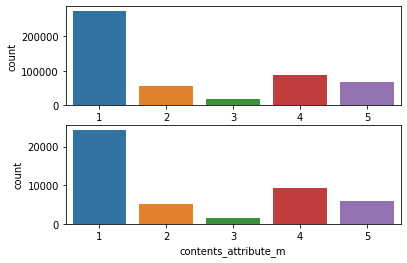

In [26]:
plt.subplot(211)
sns.countplot(train.contents_attribute_m)

plt.subplot(212)
sns.countplot(test.contents_attribute_m)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


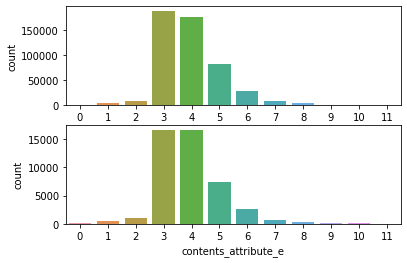

In [27]:
plt.subplot(211)
sns.countplot(train.contents_attribute_e)

plt.subplot(212)
sns.countplot(test.contents_attribute_e)

#Time

> col 내의 unique 갯수가 많기 때문에 dummy화 진행 x

month > 수빈님 의견 : 상반기 하반기 추이가 비슷하면 1(7) 등,,,

근데 아직 모르겠음 보류


In [28]:
time_train

,contents_open_dt_month,contents_open_dt_day,contents_open_dt_hour,contents_open_dt_minute,contents_open_dt_sec
0,1,17,12,9,36
1,6,18,17,48,52
2,7,8,20,0,10
3,1,13,18,9,34
4,3,9,20,39,22
...,...,...,...,...,...
501946,3,13,12,55,52
501947,1,20,11,51,51
501948,8,5,17,27,24
501949,6,15,9,23,21


In [29]:
time_test

,contents_open_dt_month,contents_open_dt_day,contents_open_dt_hour,contents_open_dt_minute,contents_open_dt_sec
0,12,1,2,24,18
1,12,17,5,42,53
2,12,10,23,33,41
3,12,3,19,44,55
4,12,11,21,24,34
...,...,...,...,...,...
46399,12,17,1,6,26
46400,12,29,21,57,25
46401,12,10,19,9,9
46402,12,7,14,4,34


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


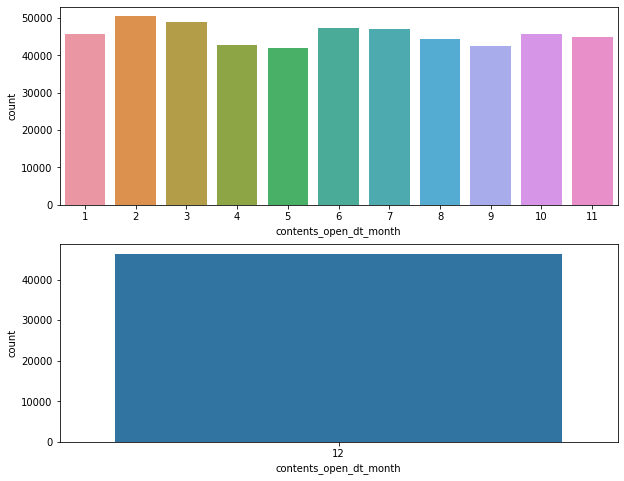

In [30]:
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.countplot(train.contents_open_dt_month)

plt.subplot(212)
sns.countplot(test.contents_open_dt_month)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


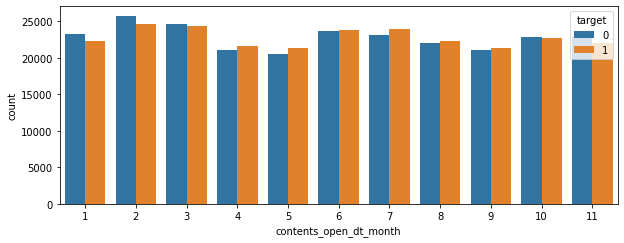

In [31]:
plt.figure(figsize=(10,8))
plt.subplot(211)
sns.countplot(train.contents_open_dt_month,hue=train.target)

# plt.subplot(212)
# sns.countplot(test.contents_open_dt_month)

> 오늘 회의 의견:

- train 은 balanced 한 data이지만 test는 imbalanced한 데이터일 가능성이 있다! (0<1)
- 상반기랑 하반기의 추이가 차이나지 않으면, 1(7),…,6(12) 이렇게 봐도 되지 않을까요? just opinion

In [32]:
time_train.contents_open_dt_month.value_counts().sort_index()

1     45683
2     50424
3     49029
4     42790
5     42017
6     47444
7     47129
8     44458
9     42393
10    45605
11    44979
Name: contents_open_dt_month, dtype: int64

In [33]:
time_test.contents_open_dt_month.value_counts()

12    46404
Name: contents_open_dt_month, dtype: int64

#Dummy ( One Hot Encoding)

In [35]:
train.columns

#person attribute > a_1, b
#person prefer >  c,e 
#contents i,a,j_1,j,c,k,m, e

Index(['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
       'h_m_match_yn', 'h_s_match_yn', 'person_attribute_a',
       'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
       'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
       'person_prefer_e', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3', 'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h', 'person_rn', 'contents_rn', 'target',
       'person_prefer_d_1_n', 'person_prefer_d_1_s', 'person_prefer_d_1_m',
       'person_prefer_d_1_l', 'person_prefer_d_2_n', 'person_prefer_d_2_s',
       'person_prefer_d_2_m', 'person_prefer_d_2_l', 'person_prefer_d_3_n',
       'person_prefer_d_3_s', 'person_prefer_d_3_m', 'person_prefer_d_

In [38]:
columns_1=['person_attribute_a_1','person_attribute_b','person_prefer_c','person_prefer_e',
         'contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k',
       'contents_attribute_m', 'contents_attribute_e']

train_1= pd.get_dummies(train, columns=columns_1)
test_1= pd.get_dummies(test, columns=columns_1)

In [45]:
print('original train shape: ',train.shape)
print('original test shape: ',test.shape)
print('dummy train shape: ',train_1.shape)
print('dummy test shape: ',test_1.shape)

original train shape:  (501951, 60)
original test shape:  (46404, 59)
dummy train shape:  (501951, 119)
dummy test shape:  (46404, 118)


## dummy dataframe으로 제일 적합 잘 됐었던 catboost 모델 적용시켜보기


# train_test_split

> train_1 : 더미 진행된 최종 df train

> test_1 : 더미 진행된 최종 df test

In [46]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import confusion_matrix

#splitting the data into train / test using train_test_split
x = train_1.drop('target', axis=1)
y= train_1.target

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=0)

#Catboost

In [47]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


In [70]:
from catboost import CatBoostClassifier

cbc= CatBoostClassifier(random_state=0)

cbc.fit(x_train,y_train)

Learning rate set to 0.133271
0:	learn: 0.6878663	total: 140ms	remaining: 2m 20s
1:	learn: 0.6838729	total: 275ms	remaining: 2m 17s
2:	learn: 0.6807323	total: 425ms	remaining: 2m 21s
3:	learn: 0.6783089	total: 555ms	remaining: 2m 18s
4:	learn: 0.6763856	total: 691ms	remaining: 2m 17s
5:	learn: 0.6748040	total: 822ms	remaining: 2m 16s
6:	learn: 0.6733959	total: 961ms	remaining: 2m 16s
7:	learn: 0.6720784	total: 1.09s	remaining: 2m 14s
8:	learn: 0.6710241	total: 1.24s	remaining: 2m 16s
9:	learn: 0.6701174	total: 1.38s	remaining: 2m 16s
10:	learn: 0.6694037	total: 1.52s	remaining: 2m 16s
11:	learn: 0.6687252	total: 1.66s	remaining: 2m 16s
12:	learn: 0.6679844	total: 1.8s	remaining: 2m 16s
13:	learn: 0.6674686	total: 1.93s	remaining: 2m 15s
14:	learn: 0.6669935	total: 2.07s	remaining: 2m 16s
15:	learn: 0.6665726	total: 2.21s	remaining: 2m 16s
16:	learn: 0.6659303	total: 2.35s	remaining: 2m 15s
17:	learn: 0.6655517	total: 2.48s	remaining: 2m 15s
18:	learn: 0.6651864	total: 2.62s	remaining: 

In [50]:
y_pred= cbc.predict(x_test)
print(round(f1_score(y_test, y_pred),4))

0.6404


> 0.639 에서 0.64로 약 0.01정도만 올랐다..


In [73]:
#그래도 올랐으니까 일단 저장한다
train_1.to_csv('/content/drive/MyDrive/잡케어/train_dum_1.csv',index=False)
test_1.to_csv('/content/drive/MyDrive/잡케어/test_dum_1.csv',index=False)

#Scaling
> 혹시 scaling 하면 결과가 좋아질까?

> 연속형 변수가 적고 명목형 변수가 많기 때문에 효과 x

>minmax > 0.6401
> Robust > 0.6329

연속형 데이터가 아니라서 scaling이 안먹힐 것 같긴 했지만 진짜로 성능이 떨어짐..

SCALING OUT

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

mm_scaler= MinMaxScaler()
rb_scaler= RobustScaler()
s_scaler= StandardScaler()

#1. Minmax
m_x_train= mm_scaler.fit_transform(x_train)
m_x_test= mm_scaler.fit_transform(x_test)

#1. Robust
r_x_train= rb_scaler.fit_transform(x_train)
r_x_test= rb_scaler.fit_transform(x_test)

#1. Standard
s_x_train= s_scaler.fit_transform(x_train)
s_x_test= s_scaler.fit_transform(x_test)